# Seoul Bike Sharing Demand

This project uses a [data set](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from the UCI repository containing information on the number of rented bikes in Seoul by hour from 01/12/2017 to 30/11/2018. A lot of weather information was also collected fro each hour of this period.

The aim of the project is to develop a regression model to predict the number of rented bikes in Seoul based on weather and date information.

According to the UCI repository:
> Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

The owners of the data set have some published articles with their findings. An open article with their results can be found [here](https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789).

## Data set attributes

* Date - dd/mm/yyyy
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature(degC) - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - Yes or No

Size of data set: 8760 entries.

# EDA

In [1]:
# Basic imports for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting seaborn style
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
# Read data-set
df = pd.read_csv("SeoulBikeData.csv")

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8760 non-null   object 
 1   Rented Bike Count            8760 non-null   int64  
 2   Hour                         8760 non-null   int64  
 3   Temperature(degC)            8760 non-null   float64
 4   Humidity(%)                  8760 non-null   int64  
 5   Wind speed (m/s)             8760 non-null   float64
 6   Visibility (10m)             8760 non-null   int64  
 7   Dew point temperature(degC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)      8760 non-null   float64
 9   Rainfall(mm)                 8760 non-null   float64
 10  Snowfall (cm)                8760 non-null   float64
 11  Seasons                      8760 non-null   object 
 12  Holiday                      8760 non-null   object 
 13  Functioning Day   

There are no missing values in our dataframe.

## Handling date information

We can convert the `Date` column to datetime object and extract the month and day of the week to get more informative features (we can expect that some week days have more rented bikes than others, for example).

In [8]:
# Convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [9]:
df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [10]:
# Extracting day of the week (dow) and month info
df['dow'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()

We can create a `weekend` column to explore how weekends affect rented bike counts.

In [11]:
# Let's create a weekend column
def is_weekend(d):
    if d == 'Saturday' or d == 'Sunday':
        return 1
    else:
        return 0

df['weekend'] = df['dow'].apply(is_weekend)

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0


The `Holiday` column is filled with strings. This can be put into a binary form using 0 for **No Holiday** and 1 for **Holiday**.

In [13]:
# Dealing with the 'Holiday' column - transforming data to 0 (No Holiday) or 1 (Holiday)
df['Holiday'] = df['Holiday'].apply(lambda H: 0 if H == 'No Holiday' else 1)

We can do the same for the `Functioning Day` column:

In [ ]:
# Doing the same for the 'Functioning Day' column
df['Functioning Day'] = df['Functioning Day'].apply(lambda F: 1 if F == 'Yes' else 0)

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0


## In the next few cells, I'll reproduce some figures from the [article](https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789) of the dataset owners.

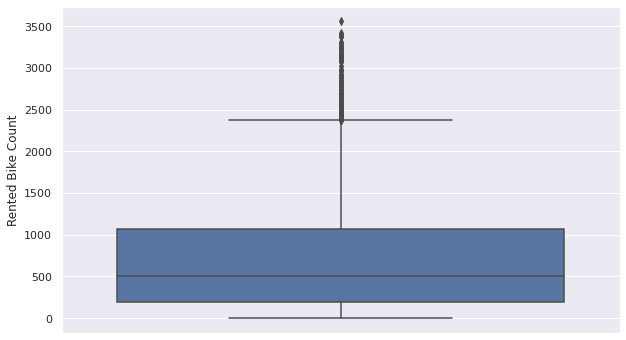

In [18]:
sns.boxplot(y='Rented Bike Count', data = df);

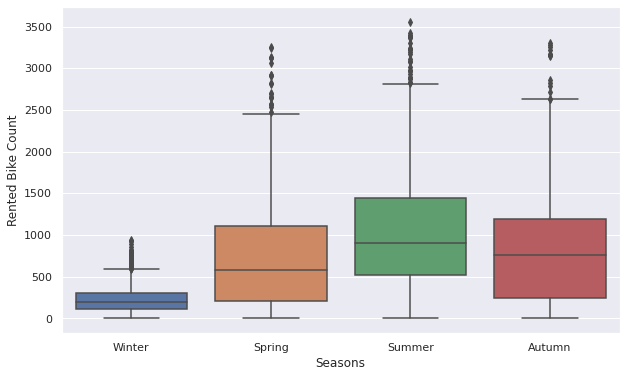

In [19]:
sns.boxplot(x='Seasons', y = 'Rented Bike Count', data = df);

Summer is the season with highest number of rented bikes and winter is the season with the lowest. Spring and autumn have similar distributions.

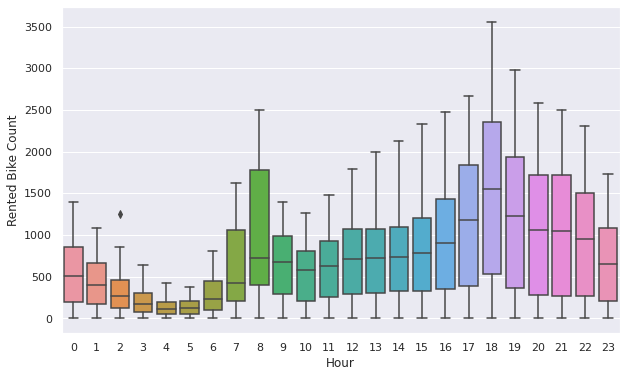

In [20]:
sns.boxplot(x='Hour', y = 'Rented Bike Count', data = df);

We can notice two picks here around 8h and 18h which may indicate that people use bikes to get to work in the morning and to go back home by the end of the working day.

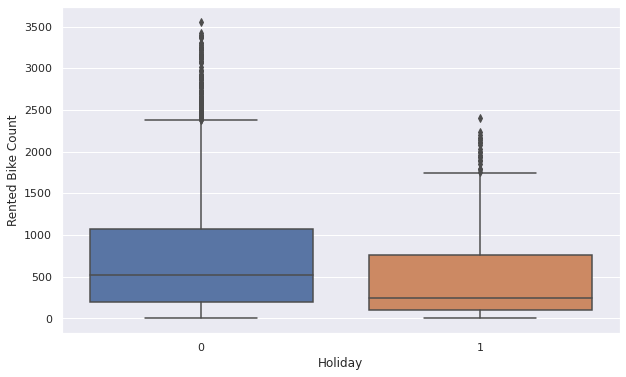

In [21]:
sns.boxplot(x='Holiday', y = 'Rented Bike Count', data = df);

The distribution of rented bikes is more spread out outside holidays. This can mean that bikes are used for communting to work, which makes sense.

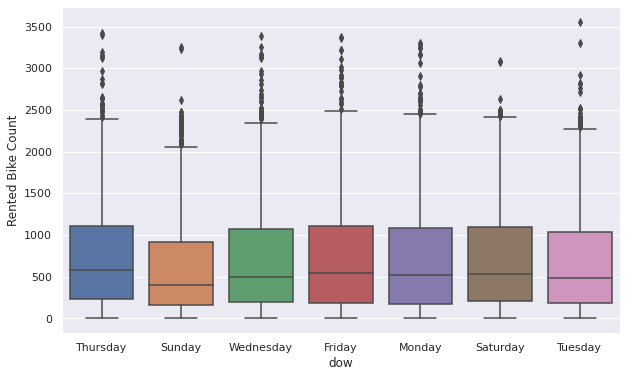

In [22]:
sns.boxplot(x='dow', y = 'Rented Bike Count', data = df);

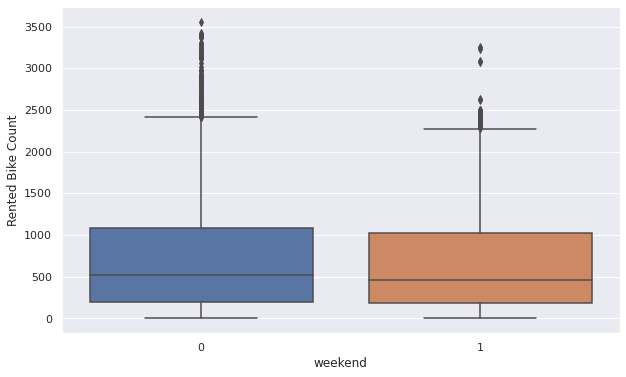

In [23]:
sns.boxplot(x='weekend', y = 'Rented Bike Count', data = df);

## End of article figures

Next, we can do simple line plots to see the evolution of the number of rented bikes along the observed period as well as weather conditions, hourly.

<AxesSubplot:ylabel='Rented Bike Count'>

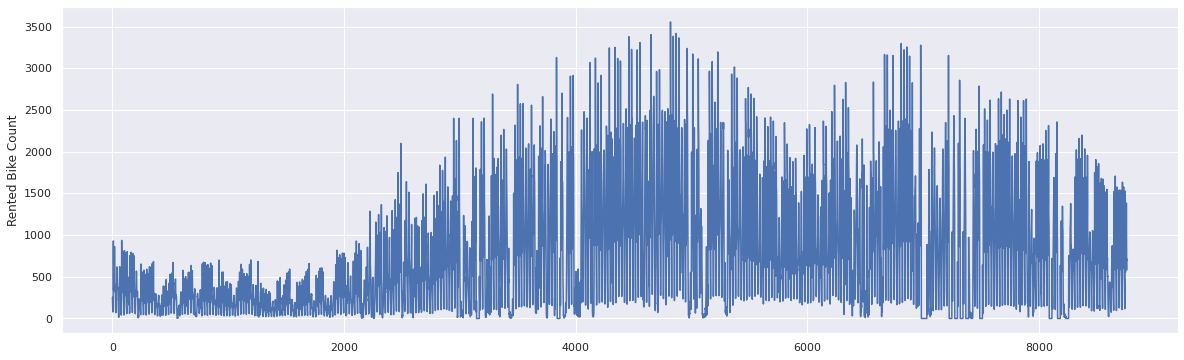

In [24]:
plt.figure(figsize=(20,6))
sns.lineplot(x = df.index, y = 'Rented Bike Count', data = df);

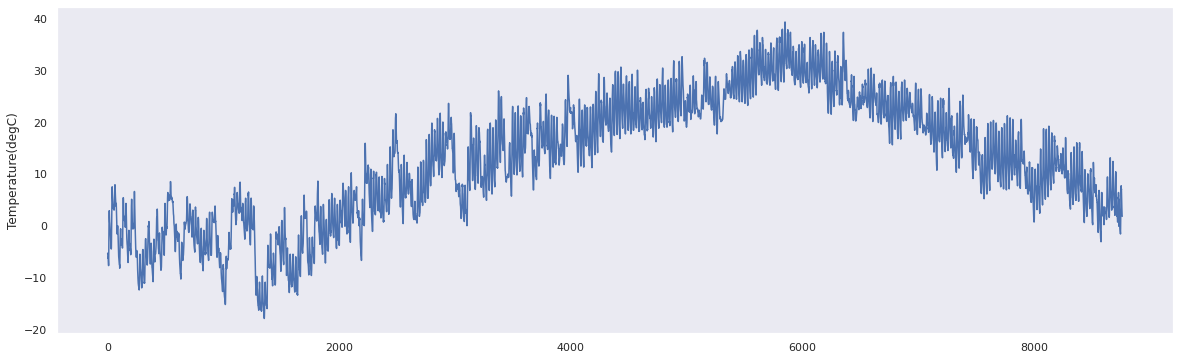

In [117]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Temperature(degC)', data = df);

<AxesSubplot:ylabel='Snowfall (cm)'>

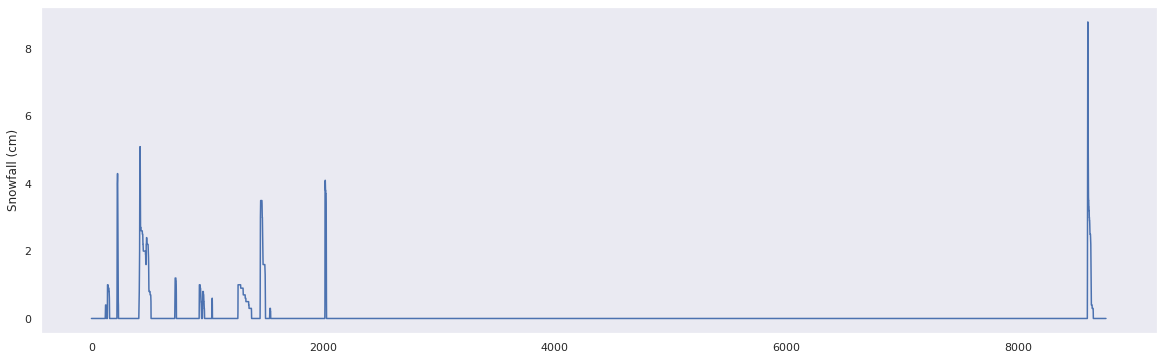

In [26]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Snowfall (cm)', data = df);

<AxesSubplot:ylabel='Rainfall(mm)'>

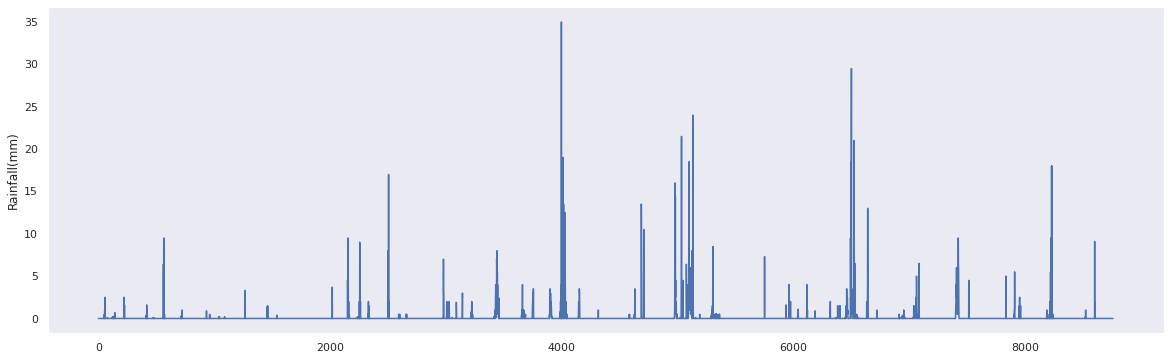

In [27]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Rainfall(mm)', data = df)

<AxesSubplot:ylabel='Visibility (10m)'>

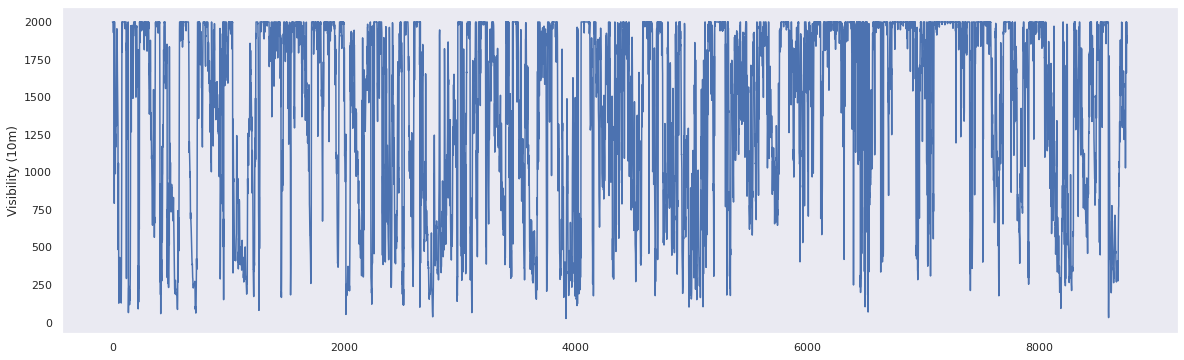

In [28]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Visibility (10m)', data = df)

<AxesSubplot:ylabel='Wind speed (m/s)'>

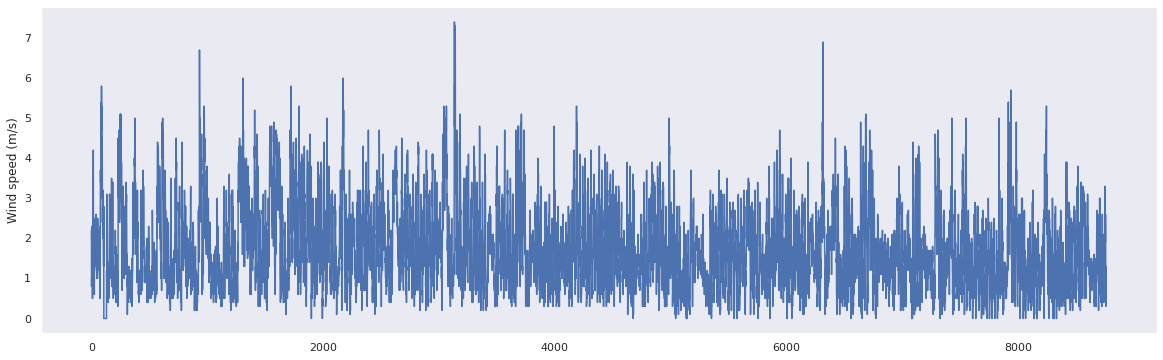

In [29]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Wind speed (m/s)', data = df)

To get a better feel for the temperature range in Seoul, we can do a histogram of the temperature along the observed period.

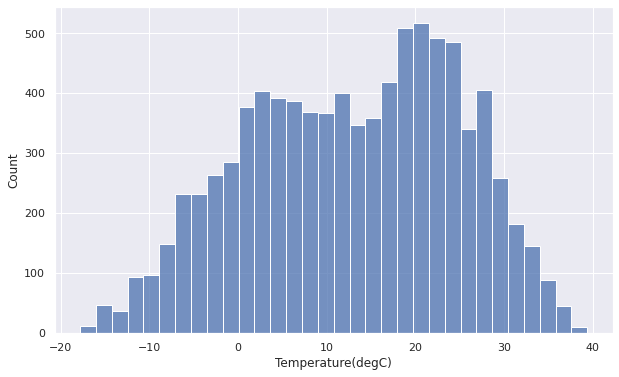

In [118]:
sns.histplot(data = df, x='Temperature(degC)');

We can do the same with humidity, for example.

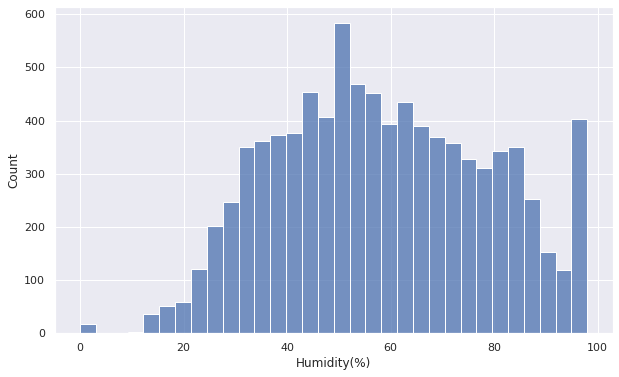

In [119]:
sns.histplot(data = df, x='Humidity(%)');

To start getting a sense as to how weather affects the rented bikes, we can build a scatter plot of rented bikes vs. temperature to see if there is any correlations between high temperatues and high bike demand.

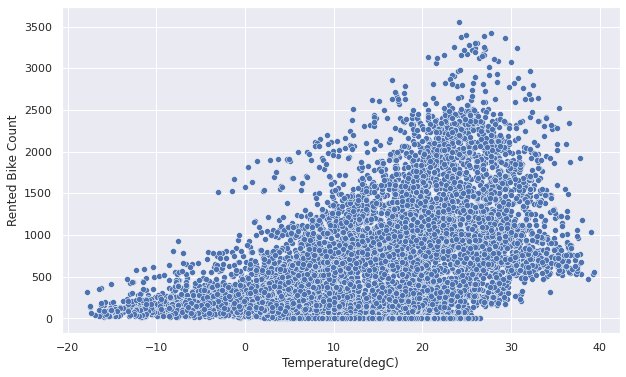

In [120]:
sns.scatterplot(x = 'Temperature(degC)', y ='Rented Bike Count', data=df);

There really seems to be a tendency for people in Seoul to rent more bikes in hotter days. Let's inspect this visual correlation between all features by doing a pairplot on the whole dataframe.

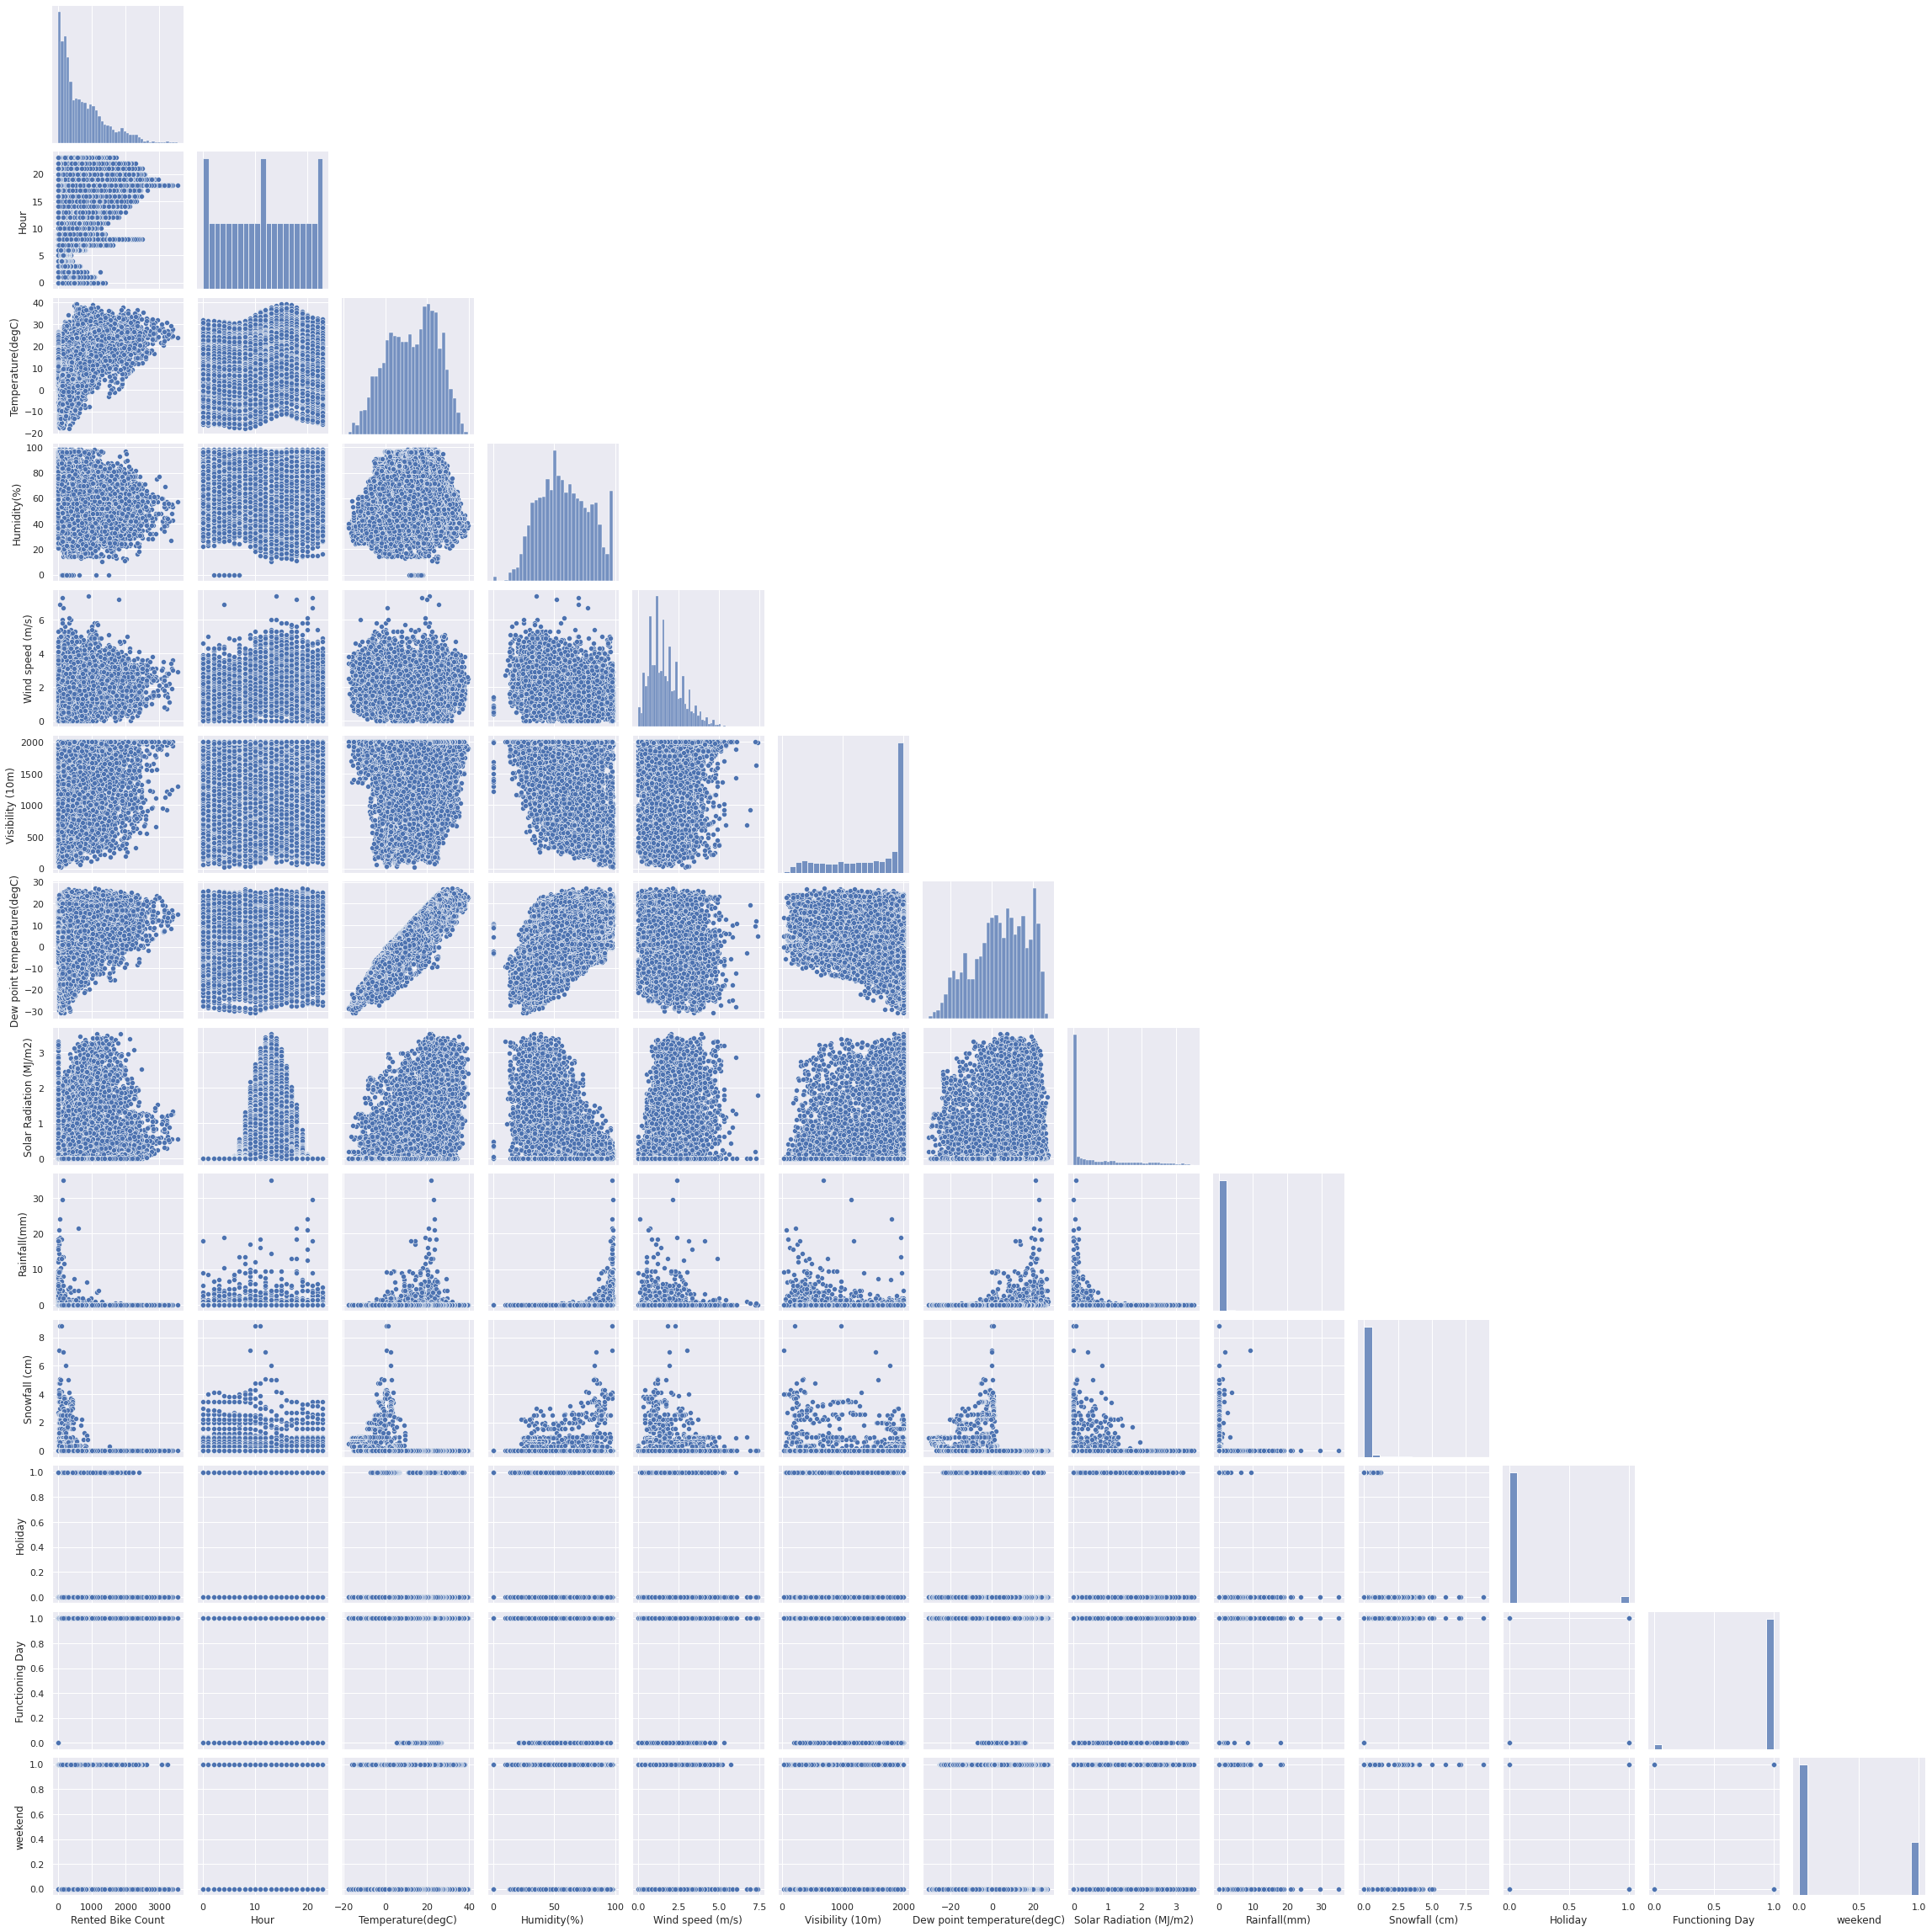

In [33]:
sns.pairplot(df, corner=True);

## A little exploration on the different seasons

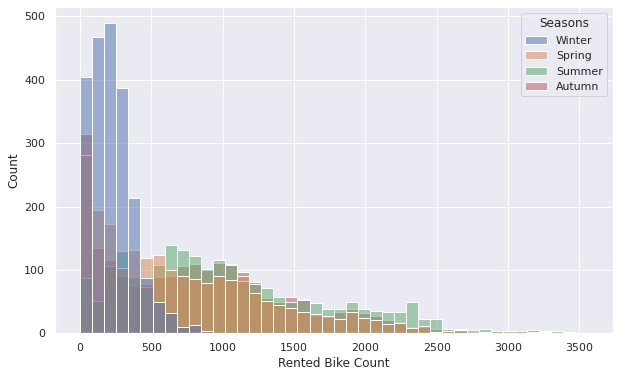

In [34]:
sns.histplot(data = df, x = 'Rented Bike Count', hue='Seasons');

In [35]:
# EDA by season
season = df.groupby('Seasons')[['Rented Bike Count','Temperature(degC)', 'Humidity(%)']].agg(['min', 'max', 'mean'])

In [36]:
season

Rented Bike Count                    Temperature(degC)        \
                      min   max         mean               min   max   
Seasons                                                                
Autumn                  0  3298   819.597985              -3.0  30.5   
Spring                  0  3251   730.031250              -6.6  29.4   
Summer                  9  3556  1034.073370              16.3  39.4   
Winter                  3   937   225.541204             -17.8  10.3   

                   Humidity(%)                 
              mean         min max       mean  
Seasons                                        
Autumn   14.120833          13  97  59.228480  
Spring   13.046694           0  98  58.776721  
Summer   26.582790          21  98  64.981431  
Winter   -2.540463          14  97  49.744907

In [37]:
season['Rented Bike Count'].reset_index()

,Seasons,min,max,mean
0,Autumn,0,3298,819.597985
1,Spring,0,3251,730.031250
2,Summer,9,3556,1034.073370
3,Winter,3,937,225.541204


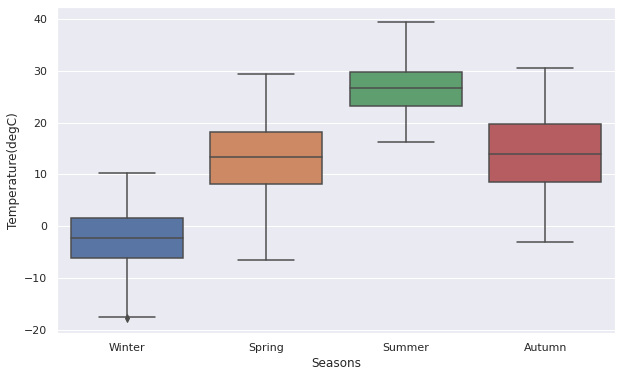

In [38]:
sns.boxplot(x='Seasons', y = 'Temperature(degC)', data = df);

# Preprocessing data

Now we can get our data to a format easily used in our predictive models. First we make a copy of `df` to keep it unchanged from here.

In [40]:
df_copy = df.copy()

In [41]:
df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Thursday,January,0


In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8760 non-null   datetime64[ns]
 1   Rented Bike Count            8760 non-null   int64         
 2   Hour                         8760 non-null   int64         
 3   Temperature(degC)            8760 non-null   float64       
 4   Humidity(%)                  8760 non-null   int64         
 5   Wind speed (m/s)             8760 non-null   float64       
 6   Visibility (10m)             8760 non-null   int64         
 7   Dew point temperature(degC)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)      8760 non-null   float64       
 9   Rainfall(mm)                 8760 non-null   float64       
 10  Snowfall (cm)                8760 non-null   float64       
 11  Seasons                      8760 non-null 

As we have transformed the `Date` column to obtain month and day of the week information, we can drop this column for our modelling.

In [43]:
df_copy = df_copy.drop('Date', axis = 1)

## Dealing with non-numeric features

Using panda's `select_dtypes()` function we can easily pick object features and store them in a separate df. In the same way, we can create a df with only numeric features:

In [44]:
df_nums = df_copy.select_dtypes(exclude='object')
df_objs = df_copy.select_dtypes(include='object')

Next, we use `get_dummies()` on the objects df to one-hot encode these features. Here we set `drop_first = True` to unnecessary ifnormation.

In [45]:
# Creating dummies
df_objs = pd.get_dummies(df_objs, drop_first = True)

In [46]:
df_final = pd.concat([df_nums, df_objs], axis = 1)

In [47]:
df_final.head()

,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
df_final.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(degC)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(degC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'dow_Monday', 'dow_Saturday', 'dow_Sunday',
       'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [49]:
df_final[df_final['Functioning Day'] == 0]

,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
3144,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3145,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3146,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3147,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3148,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8252,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8253,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8254,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Features

In [50]:
df_final.corr()

,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,...,-1.348852e-01,-1.392509e-01,-1.504572e-01,1.061004e-01,1.285077e-01,-4.392639e-02,8.997981e-02,-8.958464e-03,6.524433e-02,-5.147333e-03
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,...,-2.586291e-17,-6.535598e-19,-2.586291e-17,-2.586291e-17,3.333056e-19,-2.586291e-17,-2.586291e-17,3.199734e-19,-2.586291e-17,3.333056e-19
Temperature(degC),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,...,-2.560223e-01,-1.544153e-01,-2.591489e-01,2.612509e-01,1.532142e-01,-3.688838e-02,9.532769e-02,-1.276695e-01,-1.976742e-02,1.049498e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,...,-4.059040e-02,-9.117630e-02,-7.922332e-02,3.530791e-02,1.089243e-01,2.398551e-02,3.762066e-02,-6.640068e-02,2.631837e-02,3.741851e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,...,-1.886184e-02,3.156739e-02,2.590989e-02,-1.763684e-02,-8.757562e-03,5.554696e-02,1.014297e-02,-2.038926e-02,-1.965216e-02,-6.005735e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,...,-2.118916e-02,7.096315e-03,-2.204479e-02,4.539412e-02,-1.182194e-01,-9.762469e-02,-4.422262e-02,-2.223304e-02,4.024887e-02,1.202214e-01
Dew point temperature(degC),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,...,-2.340547e-01,-1.744969e-01,-2.489764e-01,2.431622e-01,1.754366e-01,-2.261047e-02,9.846295e-02,-1.366760e-01,-5.923445e-03,1.077119e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,...,-7.850674e-02,-1.934225e-02,-7.502799e-02,7.302146e-02,3.743415e-02,9.220857e-03,4.201441e-02,-4.487858e-02,-9.657711e-03,-3.860969e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,...,-1.699566e-02,2.593837e-04,-7.376835e-03,-3.608812e-02,5.590647e-02,-1.470892e-02,3.824906e-02,-3.222039e-02,-1.822977e-02,-1.641503e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,...,1.581300e-01,-5.643625e-03,1.222188e-01,-4.261607e-02,-4.325425e-02,-5.030462e-02,-5.236740e-02,6.562057e-02,-1.233070e-02,-4.116050e-02


<AxesSubplot:>

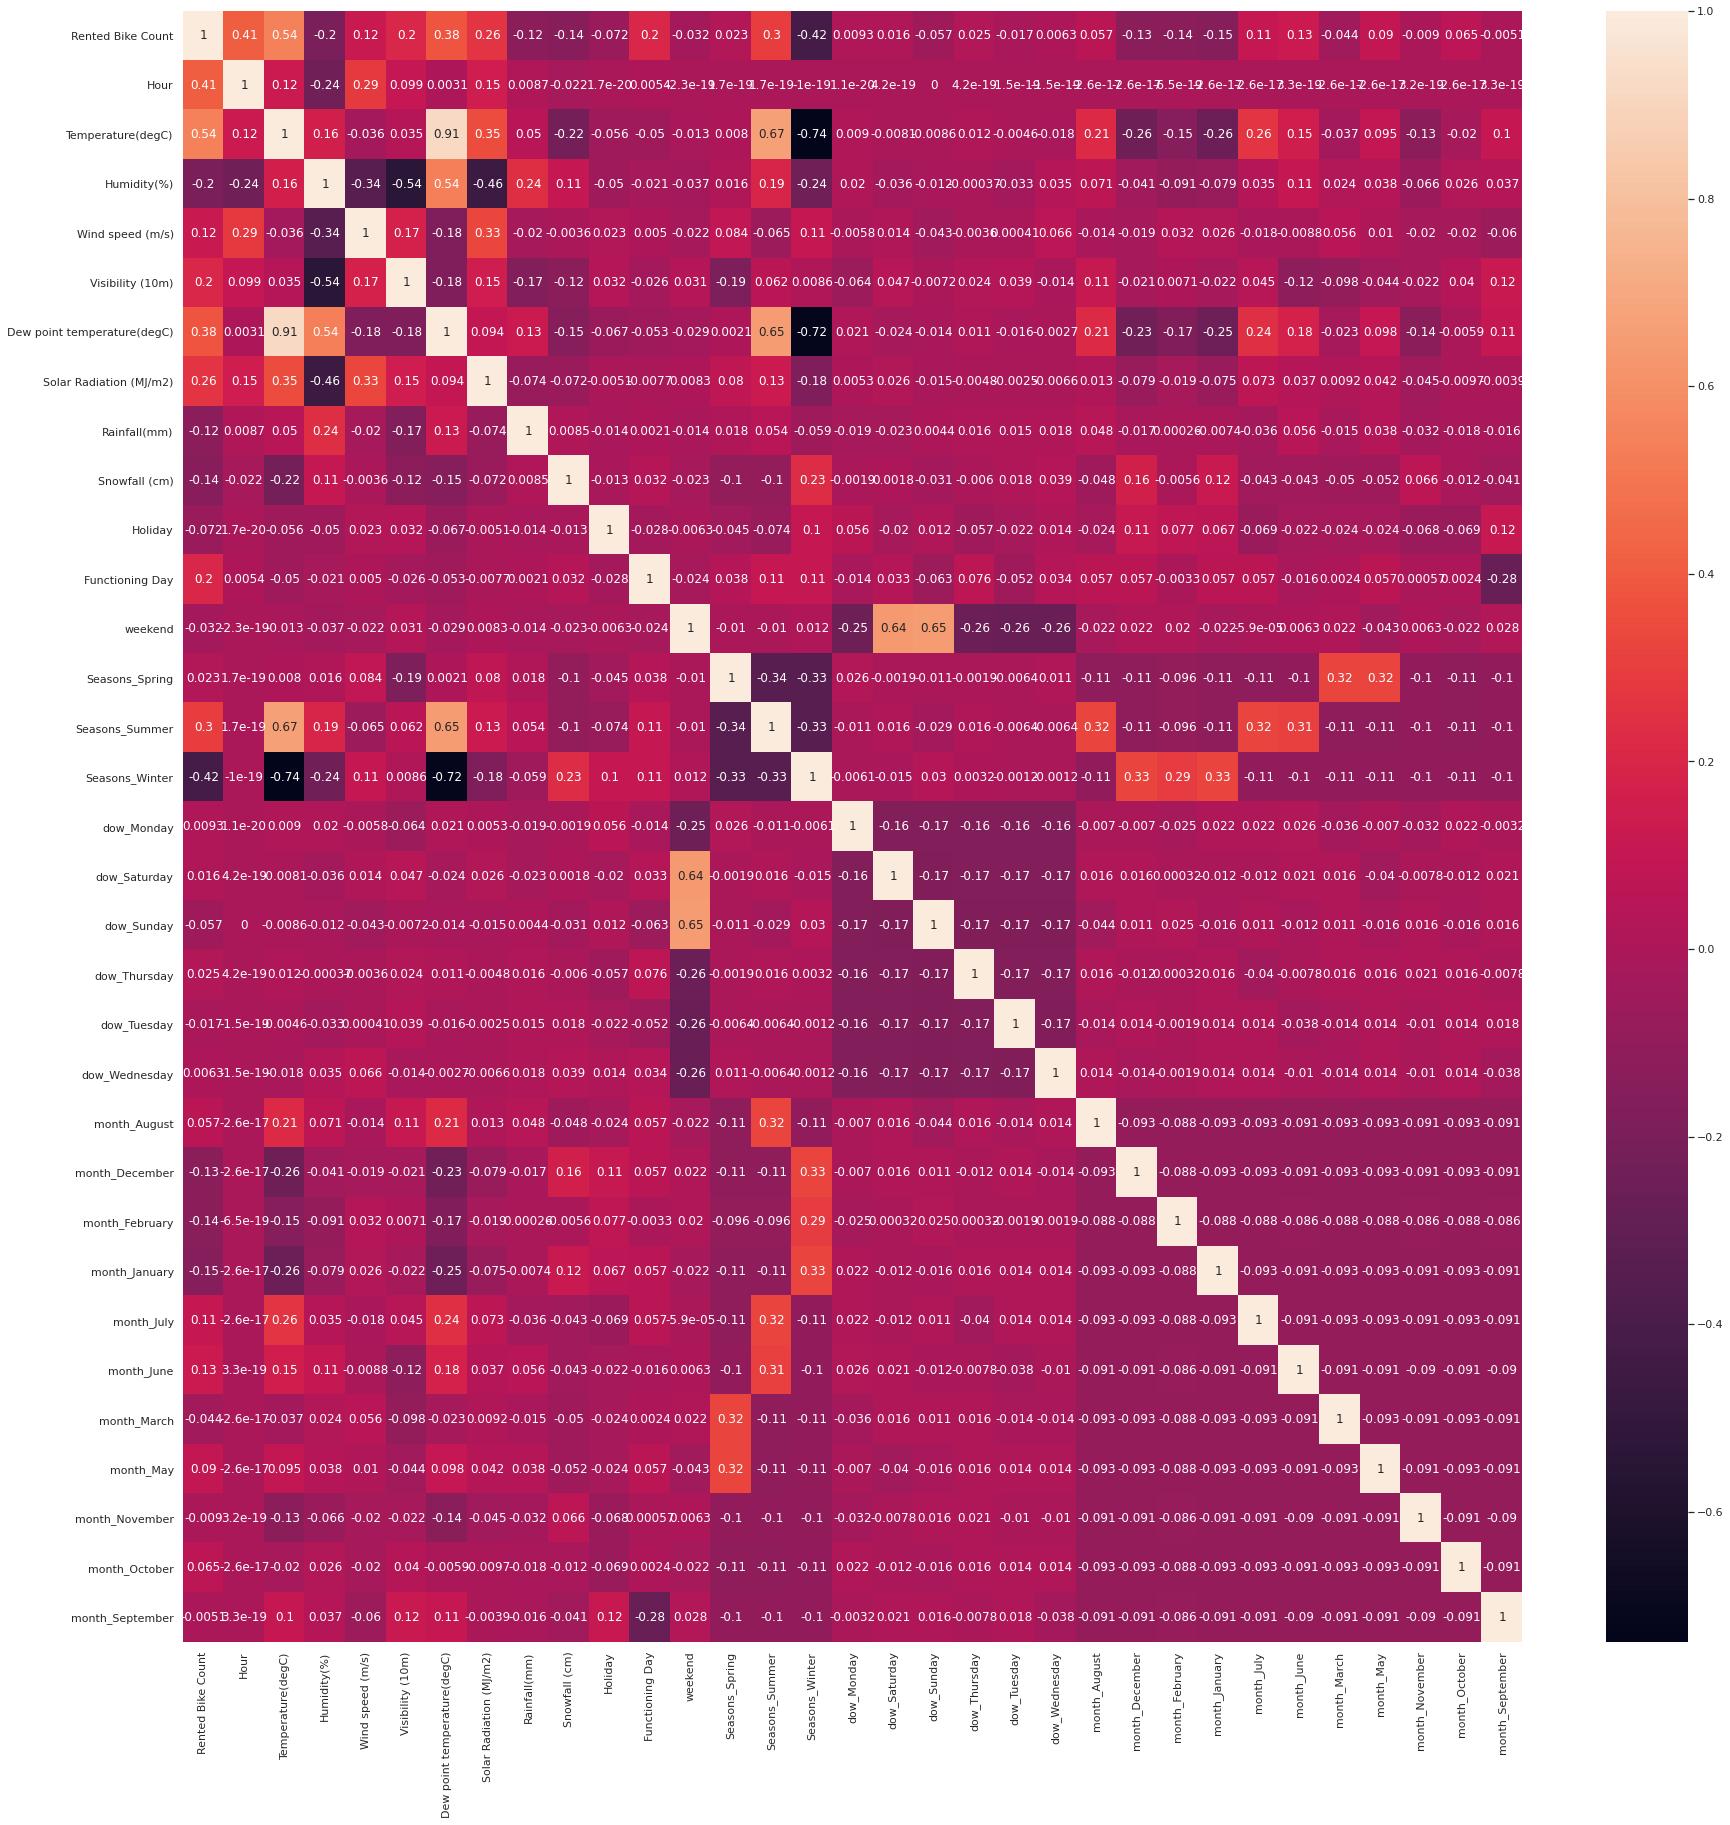

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(df_final.corr(), annot=True)

In [52]:
corr_feats = df_final.corr()['Rented Bike Count']

In [53]:
corr_feats = corr_feats.sort_values(ascending=True)

In [54]:
corr_feats

Seasons_Winter                -0.424925
Humidity(%)                   -0.199780
month_January                 -0.150457
Snowfall (cm)                 -0.141804
month_February                -0.139251
month_December                -0.134885
Rainfall(mm)                  -0.123074
Holiday                       -0.072338
dow_Sunday                    -0.057264
month_March                   -0.043926
weekend                       -0.032259
dow_Tuesday                   -0.016768
month_November                -0.008958
month_September               -0.005147
dow_Wednesday                  0.006339
dow_Monday                     0.009287
dow_Saturday                   0.016271
Seasons_Spring                 0.022888
dow_Thursday                   0.024774
month_August                   0.057119
month_October                  0.065244
month_May                      0.089980
month_July                     0.106100
Wind speed (m/s)               0.121108
month_June                     0.128508


<AxesSubplot:>

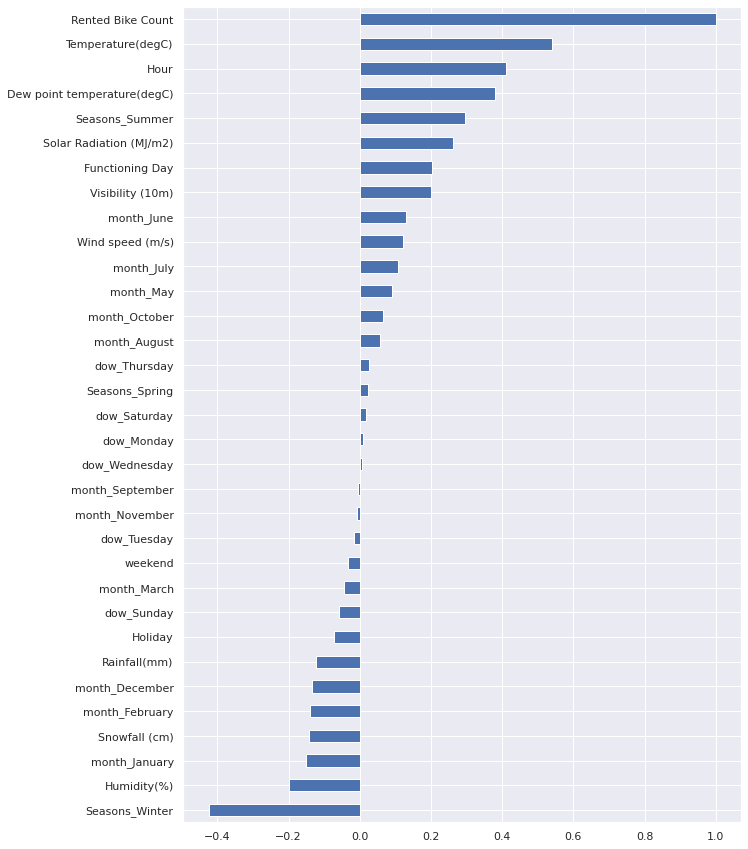

In [55]:
corr_feats.plot(kind='barh', figsize=(10,15))

# Modeling

## Elastic Net model

In [56]:
# Features and target
X = df_final.drop('Rented Bike Count', axis = 1)
y = df_final['Rented Bike Count']

In [57]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
# Fitting and scaling on train set and transforming test set
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
# Creating base model
from sklearn.linear_model import ElasticNet

base_EN_model = ElasticNet()

In [61]:
# Creating dictionary for model parameters (used in grid search ahead)
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
              'l1_ratio': [.1, .5, .7, .9, .95, 1]}

In [62]:
# Setting up the gridsearchCV
from sklearn.model_selection import GridSearchCV

gscv_model = GridSearchCV(estimator = base_EN_model,
                          param_grid = param_grid,
                          scoring = 'r2',
                          cv = 5,
                          verbose = 2)

In [63]:
# Fitting
gscv_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] 

[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.1s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.1s
[CV] a

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    7.7s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='r2', verbose=2)

In [64]:
# Best parameters
gscv_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [65]:
# Make a prediction
y_pred = gscv_model.predict(scaled_X_test)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [67]:
mean_absolute_error(y_test, y_pred)

323.5582084483027

In [68]:
mean_squared_error(y_test, y_pred)

187308.46212788566

In [69]:
r2_score(y_test, y_pred)

0.5504376490759024

## KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
# Base model
base_knn = KNeighborsRegressor(n_neighbors=5)

In [72]:
base_knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [73]:
y_pred = base_knn.predict(scaled_X_test)

In [74]:
base_knn.score(scaled_X_test, y_test)

0.7032945219939088

In [75]:
# cross-validation
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(base_knn,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [77]:
scores

array([0.71430547, 0.69777262, 0.6770367 , 0.76110572, 0.7280221 ,
       0.7265876 , 0.72396585, 0.7511029 , 0.70790447, 0.73882937])

In [78]:
abs(scores.mean())

0.7226632791338187

In [79]:
# create a loop to store r2 scores for different neighbors value
k_scores = []
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, scoring='r2', cv=10)
    k_scores.append(abs(scores.mean()))

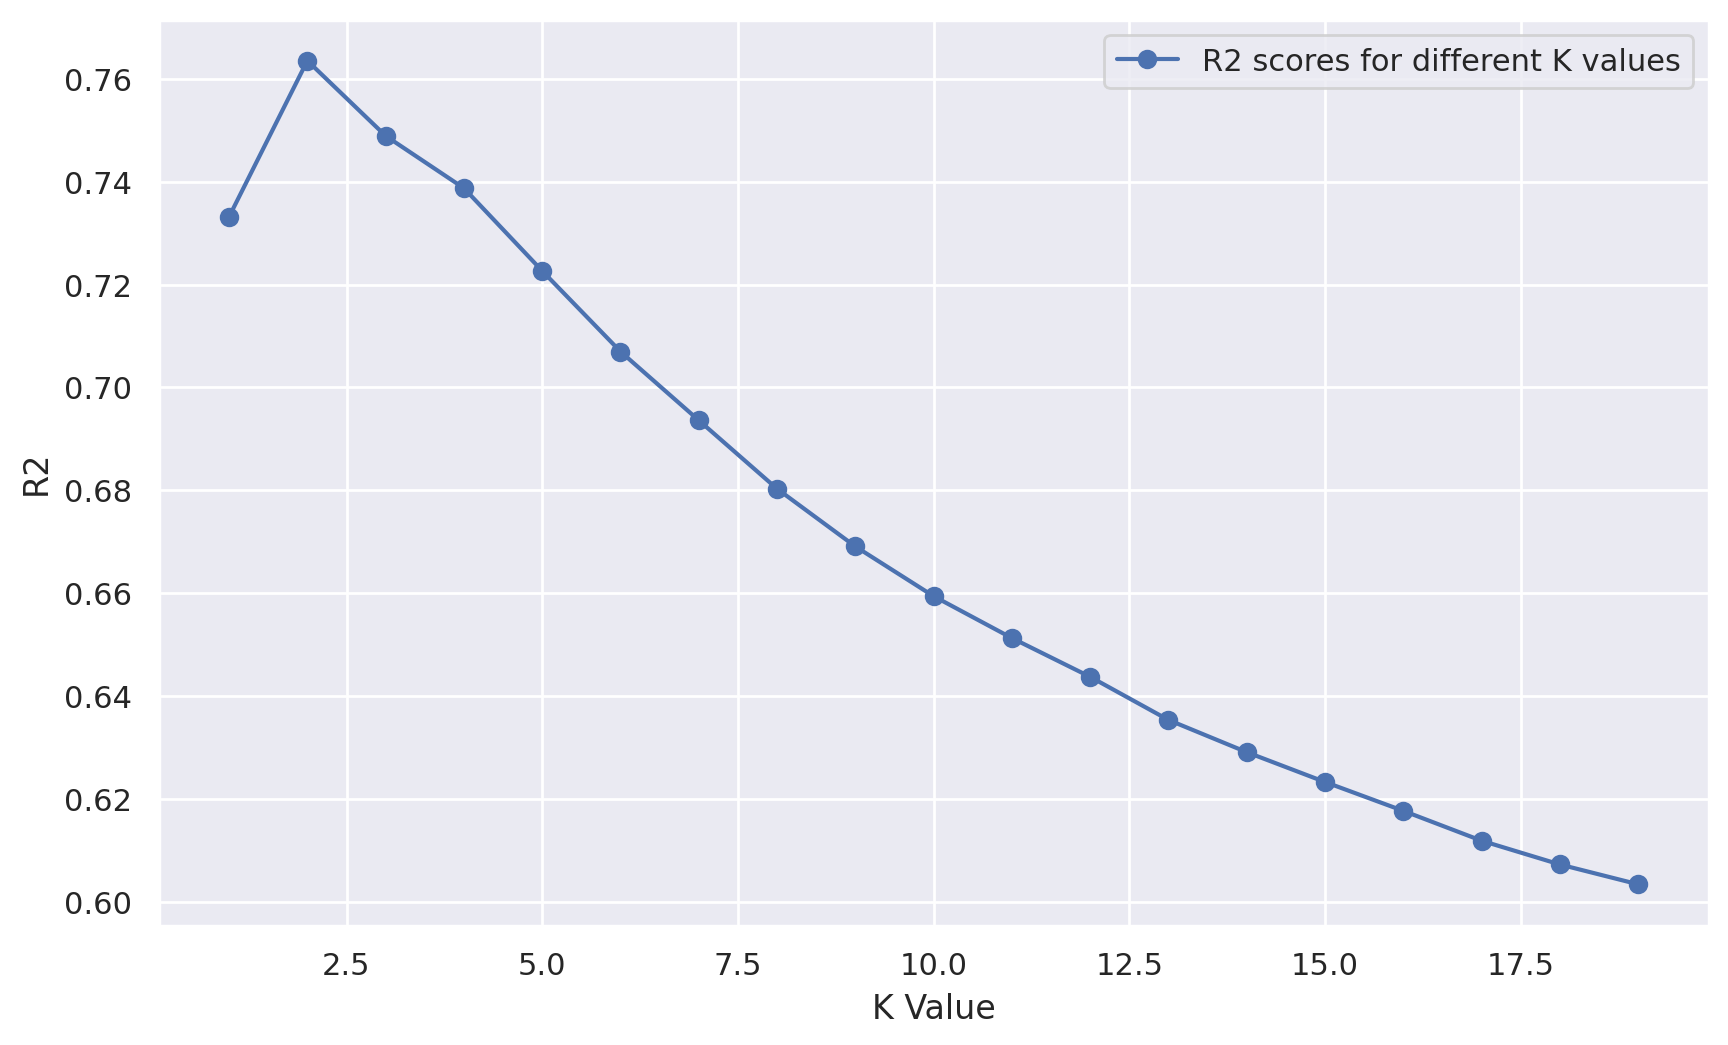

In [80]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),k_scores,
         marker="o",
         label='R2 scores for different K values')
plt.legend()
plt.ylabel('R2')
plt.xlabel("K Value");

Best performing model has **k = 2**. Let's print oout metrics for this model.

In [81]:
best_knn = KNeighborsRegressor(n_neighbors=2)
base_knn.fit(scaled_X_train, y_train)

# Cross validation
scores = cross_val_score(best_knn,scaled_X_train,y_train,
                         scoring='r2',cv=10)
knn1_r2 = abs(scores.mean())
print(knn1_r2)

0.7635461197165705


## Feature selection

Let's try to reduce the number of features to improve our model. For instance, since we have dummie features for the days of the week. We can drop the `weekend` column and see if there is any improvement.

In [82]:
# Features and target
X = df_final.drop(['Rented Bike Count', 'weekend'], axis = 1)
y = df_final['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

# Fitting and scaling on train set and transforming test set
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Base model
base_knn = KNeighborsRegressor(n_neighbors=5)
base_knn.fit(scaled_X_train, y_train)

# Cross validation
# create a loop to store r2 scores for different neighbors value
k_scores = []
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, scoring='r2', cv=10)
    k_scores.append(abs(scores.mean()))

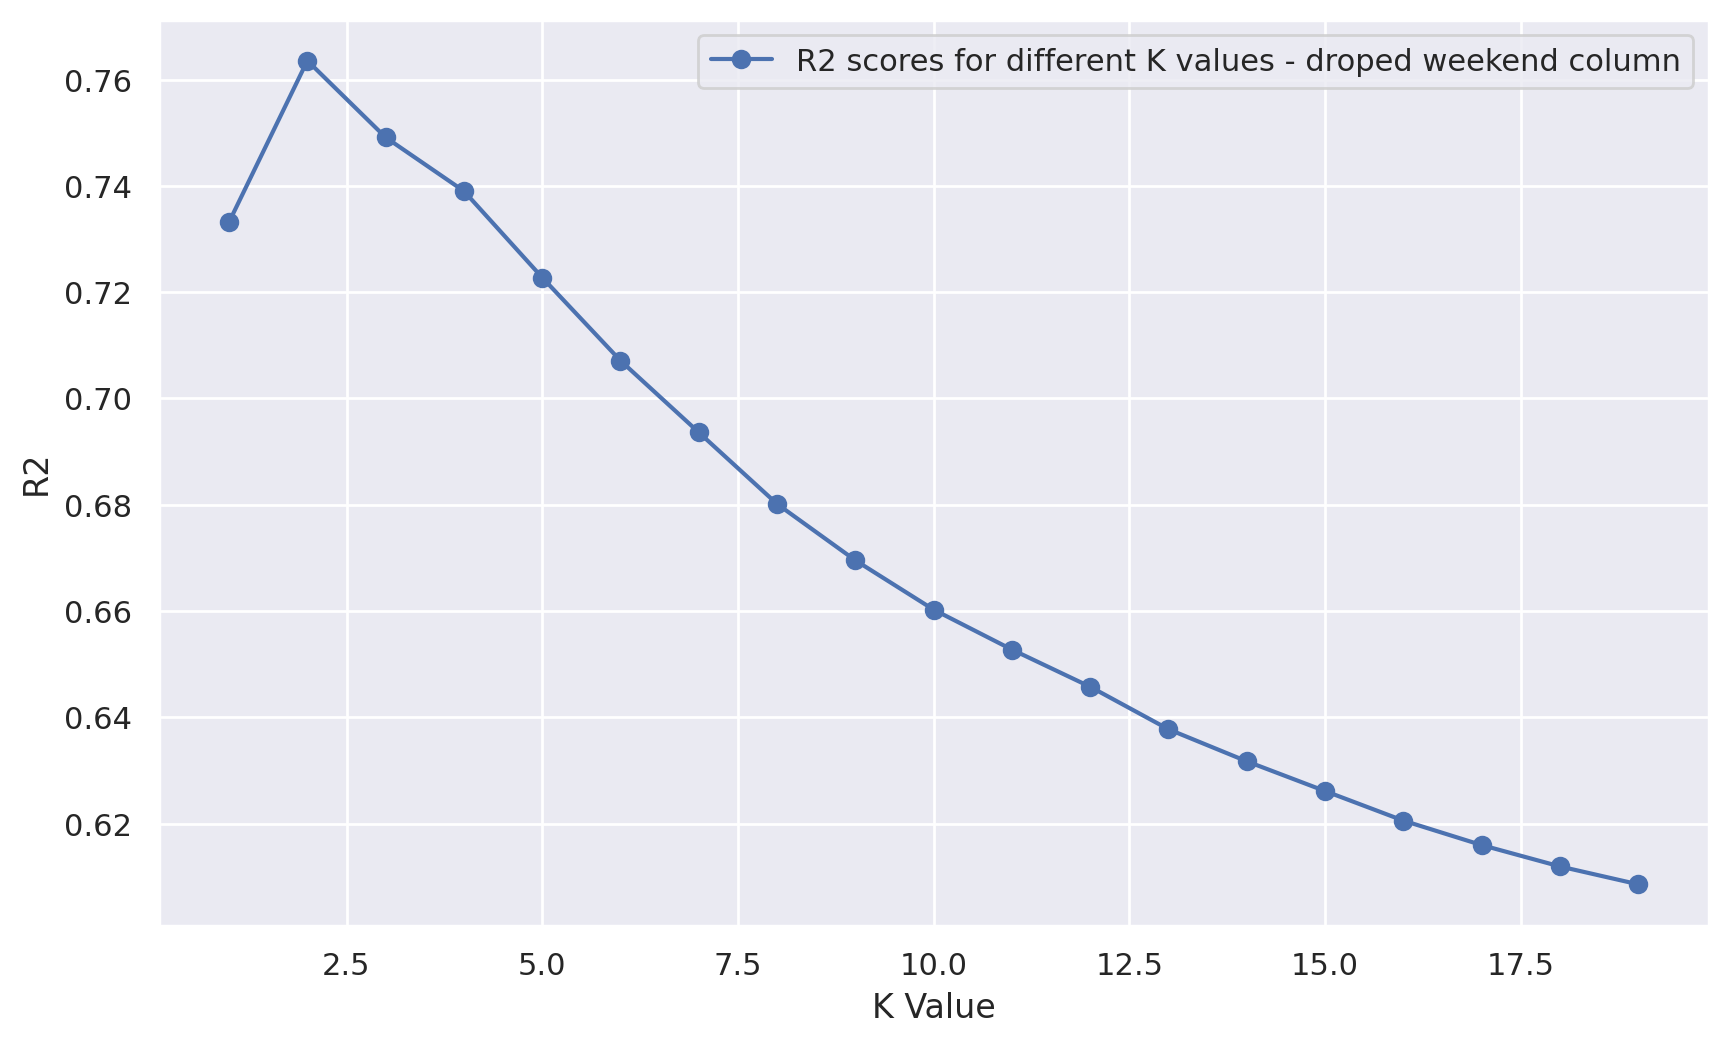

In [83]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),k_scores,
         marker="o",
         label='R2 scores for different K values - droped weekend column')
plt.legend()
plt.ylabel('R2')
plt.xlabel("K Value");

Best performing model has **k = 2**. Let's build this model and get metrics on it.

In [84]:
best_knn = KNeighborsRegressor(n_neighbors=2)
base_knn.fit(scaled_X_train, y_train)

# Cross validation
scores = cross_val_score(best_knn,scaled_X_train,y_train,
                         scoring='r2',cv=10)
knn2_r2 = abs(scores.mean())
print(knn2_r2)

0.7635431970664782


In [85]:
print(f"Improvement of {knn1_r2 - knn2_r2}")

Improvement of 2.922650092274104e-06


# RandomForest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
# Base model
base_RF = RandomForestRegressor()

In [88]:
# Tree based models don't required scaling
base_RF.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
y_pred = base_RF.predict(X_test)

In [90]:
base_RF.score(X_test,y_test)

0.8869775893095242

In [91]:
# Cross validation
scores = cross_val_score(base_RF,X_train,y_train,
                         scoring='r2',cv=10)

In [92]:
abs(scores.mean())

0.89171909312594

In [93]:
# Hyperparamter tunning
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [4,6,8,10,12,14,16,18,20, None],
#     'n_estimators': [100, 200, 300]
# }

# base_RF = RandomForestRegressor()

In [94]:
# gscv_RF = GridSearchCV(estimator = base_RF,
#                        param_grid=param_grid,
#                        scoring='r2',
#                        cv = 10,
#                        verbose = 2)

In [95]:
# Fitting
# gscv_RF.fit(X_train, y_train)

In [96]:
# Best parameters
# gscv_RF.best_params_
print("This gave: {'bootstrap': True, 'max_depth': None, 'n_estimators': 300}")

This gave: {'bootstrap': True, 'max_depth': None, 'n_estimators': 300}


In [97]:
# gscv_RF.score(X_test,y_test)

In [98]:
# Using best parameters
best_RF = RandomForestRegressor(n_estimators=300)

# Tree based models don't required scaling
best_RF.fit(X_train,y_train)

# Cross validation
scores = cross_val_score(best_RF,X_train,y_train,
                         scoring='r2',cv=10)

best_RF_r2 = abs(scores.mean())
print(best_RF_r2)

0.8928649100466901


In [99]:
importances = best_RF.feature_importances_

In [100]:
importances

array([0.28158489, 0.30372275, 0.07071083, 0.01385437, 0.01387435,
       0.02822381, 0.09062699, 0.03762566, 0.00046544, 0.00229838,
       0.08866165, 0.00824009, 0.00172214, 0.0216332 , 0.00243808,
       0.00641648, 0.00612497, 0.00162162, 0.00130609, 0.00227359,
       0.00159681, 0.00063745, 0.00096253, 0.00091197, 0.00118227,
       0.00143722, 0.00374952, 0.00149374, 0.00103582, 0.00179037,
       0.00177693])

In [101]:
X.columns

Index(['Hour', 'Temperature(degC)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(degC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'dow_Monday', 'dow_Saturday', 'dow_Sunday', 'dow_Thursday',
       'dow_Tuesday', 'dow_Wednesday', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September'],
      dtype='object')

In [102]:
importances_dict = dict(zip(X.columns, importances))
print(importances_dict)

{'Hour': 0.2815848913525969, 'Temperature(degC)': 0.30372275304436, 'Humidity(%)': 0.07071083211956941, 'Wind speed (m/s)': 0.013854367968295022, 'Visibility (10m)': 0.013874353201386202, 'Dew point temperature(degC)': 0.02822380562183691, 'Solar Radiation (MJ/m2)': 0.09062698874919868, 'Rainfall(mm)': 0.037625655500165084, 'Snowfall (cm)': 0.000465440427624651, 'Holiday': 0.0022983810027613553, 'Functioning Day': 0.08866165121639133, 'Seasons_Spring': 0.008240090215492225, 'Seasons_Summer': 0.0017221430952097441, 'Seasons_Winter': 0.02163319717578101, 'dow_Monday': 0.0024380822283368705, 'dow_Saturday': 0.006416480466900467, 'dow_Sunday': 0.006124971568569334, 'dow_Thursday': 0.001621618328891004, 'dow_Tuesday': 0.0013060880169813108, 'dow_Wednesday': 0.002273592872039459, 'month_August': 0.0015968052538812207, 'month_December': 0.0006374488436860882, 'month_February': 0.0009625299579639097, 'month_January': 0.0009119693773136004, 'month_July': 0.0011822660063384618, 'month_June': 0.0

In [103]:
# Order dictionary by value
importances_dict = {k: v for k, v in sorted(importances_dict.items(), key=lambda item: item[1])}

Text(0.5, 1.0, 'Feature importance for RandomForest model')

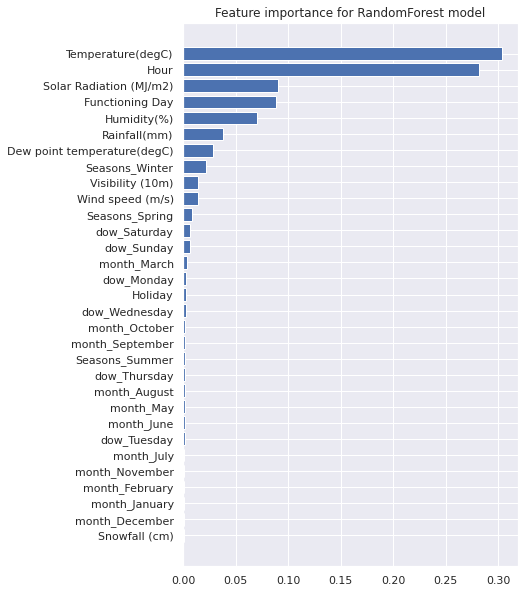

In [104]:
plt.figure(figsize=(6,10))
plt.barh(list(importances_dict.keys()), list(importances_dict.values()) )
plt.title("Feature importance for RandomForest model")

In [105]:
for name, importance in zip(X.columns, best_RF.feature_importances_):
    print(name, "=", importance)

Hour = 0.2815848913525969
Temperature(degC) = 0.30372275304436
Humidity(%) = 0.07071083211956941
Wind speed (m/s) = 0.013854367968295022
Visibility (10m) = 0.013874353201386202
Dew point temperature(degC) = 0.02822380562183691
Solar Radiation (MJ/m2) = 0.09062698874919868
Rainfall(mm) = 0.037625655500165084
Snowfall (cm) = 0.000465440427624651
Holiday = 0.0022983810027613553
Functioning Day = 0.08866165121639133
Seasons_Spring = 0.008240090215492225
Seasons_Summer = 0.0017221430952097441
Seasons_Winter = 0.02163319717578101
dow_Monday = 0.0024380822283368705
dow_Saturday = 0.006416480466900467
dow_Sunday = 0.006124971568569334
dow_Thursday = 0.001621618328891004
dow_Tuesday = 0.0013060880169813108
dow_Wednesday = 0.002273592872039459
month_August = 0.0015968052538812207
month_December = 0.0006374488436860882
month_February = 0.0009625299579639097
month_January = 0.0009119693773136004
month_July = 0.0011822660063384618
month_June = 0.0014372156845538127
month_March = 0.00374951838949847

# Using XGBoost

In [106]:
from xgboost import XGBRegressor

In [107]:
base_xgb = XGBRegressor()

# Tree based models don't required scaling
base_xgb.fit(X_train,y_train)

base_xgb.score(X_test,y_test)

0.9034767857774397

In [108]:
# Cross validation
scores = cross_val_score(base_xgb,X_train,y_train,
                         scoring='r2',cv=10)

base_xgb_r2 = abs(scores.mean())
print(base_xgb_r2)

0.909888010003075


## Hyperparameter tunning

In [109]:
param_grid = {'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'early_stopping_rounds': [5],
              'n_estimators': [500]}

In [110]:
gscv_xgb = GridSearchCV(estimator = base_xgb,
                          param_grid = param_grid,
                          scoring = 'r2',
                          cv = 10,
                          verbose = 2)

In [111]:
gscv_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:15:19] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   2.0s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:15:21] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   1.8s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:15:22] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   1.8s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:15:24] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  earl

[CV]  early_stopping_rounds=5, learning_rate=0.05, n_estimators=500, total=   1.8s
[CV] early_stopping_rounds=5, learning_rate=0.05, n_estimators=500 ...
[22:15:53] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  early_stopping_rounds=5, learning_rate=0.05, n_estimators=500, total=   1.8s
[CV] early_stopping_rounds=5, learning_rate=0.07, n_estimators=500 ...
[22:15:55] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  earl

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   54.0s finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
     

In [112]:
gscv_xgb.best_score_

0.9149092051865132

In [113]:
gscv_xgb.best_params_

{'early_stopping_rounds': 5, 'learning_rate': 0.07, 'n_estimators': 500}

In [114]:
gscv_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Building best model

In [115]:
best_xgb = XGBRegressor(n_estimators = 500,
                        learning_rate = 0.07,
                        early_stopping_rounds = 5)

# Tree based models don't required scaling
best_xgb.fit(X_train,y_train)

best_xgb.score(X_test,y_test)

[22:16:15] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9104945340015402

In [116]:
# Cross validation
scores = cross_val_score(best_xgb,X_train,y_train,
                         scoring='r2',cv=10)

best_xgb_r2 = abs(scores.mean())
print(best_xgb_r2)

[22:16:17] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:16:19] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:16:21] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if y